In [ ]:
# mount colab drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# add this notebook's folder path

folder_thisNotebook = 'NGA/Foundation/geo deep learning'

In [ ]:
# This notebook's folder path
path_drive_folder_thisNotebook = 'drive/My Drive/Colab Notebooks/' + folder_thisNotebook

In [ ]:
import os
os.chdir(path_drive_folder_thisNotebook)
!pwd

/content/drive/My Drive/Colab Notebooks/NGA/Foundation/geo deep learning


In [ ]:
ls

 geo.ipynb           map.png
'geo python.ipynb'   RarePlanes_Train_Coco_Annotations_tiled.json


## Rareplanes categories

In [ ]:
# Alex edit
import os
cwd = os.getcwd()
cwd

'/content/drive/My Drive/Colab Notebooks/NGA/Foundation/geo deep learning'

In [ ]:
#path_train_imgs = cwd + '/datasets/rareplanes/train/PS-RGB_tiled'
path_train_lbls = cwd + '/RarePlanes_Train_Coco_Annotations_tiled.json'

In [ ]:
import json

with open(path_train_lbls) as json_file_lbls:
  json_file_coco = json.load(json_file_lbls)

In [ ]:
json_file_coco.keys()

dict_keys(['annotations', 'categories', 'licenses', 'images', 'info'])

In [ ]:
len(json_file_coco['categories'])

18393

In [ ]:
categories = {}
category_count = 0

for label in json_file_coco['categories']:
  categories[label['role']] = categories.get(label['role'], 0) + 1

In [ ]:
categories

{'Large Civil Transport/Utility': 1450,
 'Medium Civil Transport/Utility': 6123,
 'Military Bomber': 6,
 'Military Fighter/Interceptor/Attack': 185,
 'Military Trainer': 17,
 'Military Transport/Utility/AWAC': 284,
 'Small Civil Transport/Utility': 10328}

In [ ]:
categories['Small Civil Transport/Utility'] = 0
categories['Medium Civil Transport/Utility'] = 1
categories['Large Civil Transport/Utility'] = 2
categories['Military Bomber'] = 3
categories['Military Trainer'] = 4
categories['Military Transport/Utility/AWAC'] = 5
categories['Military Fighter/Interceptor/Attack'] = 6

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 34.0 MB/s 
     |████████████████████████████████| 16.7 MB 27.5 MB/s 


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/object_detection_torch' + '/datasets/rareplanes/train/PS-RGB_tiled' + '/103_10400100080A3000_tile_160.png'

path_train_geojson = '/content/drive/MyDrive/Colab Notebooks/object_detection_torch' + '/datasets/rareplanes/train/geojson/geojson_aircraft_tiled'

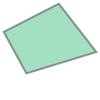

In [ ]:
geojson_sample = path_train_geojson + os.sep + '103_10400100080A3000_tile_160.geojson'

df_rareplanes_sample = gpd.read_file(geojson_sample)

df_rareplanes_sample['geometry'][0]

In [ ]:
df_rareplanes_sample['geometry']

# uncomment to plot
#same as df_rareplanes_sample.plot()

0    POLYGON ((-110.73704 43.60346, -110.73733 43.6...
1    POLYGON ((-110.73683 43.60384, -110.73714 43.6...
2    POLYGON ((-110.73664 43.60422, -110.73694 43.6...
3    POLYGON ((-110.73654 43.60457, -110.73672 43.6...
Name: geometry, dtype: geometry

In [ ]:
df_rareplanes_sample.head(1)

,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,num_tail_fins,...,length,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,geometry
0,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,32.061459,33.587068,538.07106,3,1,0,1.0,0,538.07106,"POLYGON ((-110.73704 43.60346, -110.73733 43.6..."


In [ ]:
df_rareplanes_sample.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_rp_prjctd = df_rareplanes_sample.to_crs('EPSG: 4326')
# df_rp_prjctd = df_rareplanes_sample.to_crs('OGC:CRS84')

df_rp_prjctd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_rp_prjctd['geometry']

0    POLYGON ((-110.73704 43.60346, -110.73733 43.6...
1    POLYGON ((-110.73683 43.60384, -110.73714 43.6...
2    POLYGON ((-110.73664 43.60422, -110.73694 43.6...
3    POLYGON ((-110.73654 43.60457, -110.73672 43.6...
Name: geometry, dtype: geometry

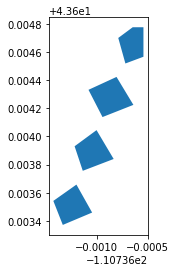

In [ ]:
df_rp_prjctd.plot()

In [ ]:
type(df_rp_prjctd)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(df_rp_prjctd.centroid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


geopandas.geoseries.GeoSeries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


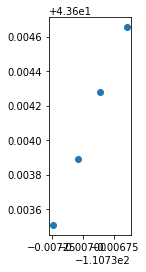

In [ ]:
df_rp_prjctd.centroid.plot()

In [ ]:
df_rp_prjctd['centroids'] = df_rp_prjctd.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
df_rp_prjctd.head()

,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,num_tail_fins,...,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,geometry,centroids
0,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,33.587068,538.071060,3,1,0,1.00000,0,538.071060,"POLYGON ((-110.73704 43.60346, -110.73733 43.6...",POINT (-110.73724 43.60351)
1,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,33.887799,550.796866,3,1,0,1.00000,0,550.796866,"POLYGON ((-110.73683 43.60384, -110.73714 43.6...",POINT (-110.73704 43.60389)
2,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,33.553819,628.656538,3,1,0,1.00000,0,628.656538,"POLYGON ((-110.73664 43.60422, -110.73694 43.6...",POINT (-110.73686 43.60428)
3,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,35.042539,570.560625,3,1,0,0.74806,1,426.813736,"POLYGON ((-110.73654 43.60457, -110.73672 43.6...",POINT (-110.73665 43.60465)


In [ ]:
df_rp_prjctd['role'].describe()

count                                  4
unique                                 1
top       Medium Civil Transport/Utility
freq                                   4
Name: role, dtype: object

## gpd.centroid is a list of shapely geometry points

In [ ]:
df_rp_prjctd.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-110.73724 43.60351)
1    POINT (-110.73704 43.60389)
2    POINT (-110.73686 43.60428)
3    POINT (-110.73665 43.60465)
dtype: geometry

In [ ]:
list(df_rp_prjctd.centroid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


## convert shapely points to numpy array
https://gis.stackexchange.com/questions/252764/converting-a-list-of-shapely-geometry-to-numpy-array

In [ ]:
df_rp_prjctd.centroid[0].xy[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


array('d', [-110.73724404991711])

In [ ]:
df_rp_prjctd.centroid[0].xy[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


array('d', [-110.73724404991711])

In [ ]:
df_rp_prjctd.centroid[0].xy[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


array('d', [43.60350766400351])

In [ ]:
import fiona
from shapely.geometry import shape
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


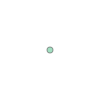

In [ ]:
df_rareplanes_sample.to_crs('OGC:CRS84').centroid[0]

In [ ]:
df_rareplanes_sample.to_crs('OGC:CRS84').centroid[0].xy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


(array('d', [-110.73724404991711]), array('d', [43.60350766400351]))

In [ ]:
df_rareplanes_sample.to_crs('OGC:CRS84').centroid[0].xy[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


array('d', [-110.73724404991711])

In [ ]:
df_rareplanes_sample.to_crs('OGC:CRS84').centroid[0].xy[0][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


-110.73724404991711

In [ ]:
df_rareplanes_sample.to_crs('OGC:CRS84').centroid[0].xy[1][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


43.60350766400351

In [ ]:
[ print((geom.xy[0][0], geom.xy[1][0])) for geom in df_rareplanes_sample.to_crs('OGC:CRS84').centroid ]

(-110.73724404991711, 43.60350766400351)
(-110.73703882828275, 43.60389174989592)
(-110.73686483000805, 43.60427846298228)
(-110.73664836785854, 43.60465461152495)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


[None, None, None, None]

In [ ]:
list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in df_rareplanes_sample.to_crs('EPSG:4326').centroid ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


## somehow the precision is getting lost during conversion to np.array

In [ ]:
list_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0]), dtype=np.object) for geom in df_rp_prjctd.centroid]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
list_arrays

[array([-110.73724404991711, 43.60350766400351], dtype=object),
 array([-110.73703882828275, 43.60389174989592], dtype=object),
 array([-110.73686483000805, 43.60427846298228], dtype=object),
 array([-110.73664836785854, 43.60465461152495], dtype=object)]

In [ ]:
df_rp_prjctd.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-110.73724 43.60351)
1    POINT (-110.73704 43.60389)
2    POINT (-110.73686 43.60428)
3    POINT (-110.73665 43.60465)
dtype: geometry

In [ ]:
df_rp_prjctd.centroid[0].xy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


(array('d', [-110.73724404991711]), array('d', [43.60350766400351]))

In [ ]:
coords = np.asarray(list_arrays)

In [ ]:
coords

array([[-110.73724404991711, 43.60350766400351],
       [-110.73703882828275, 43.60389174989592],
       [-110.73686483000805, 43.60427846298228],
       [-110.73664836785854, 43.60465461152495]], dtype=object)

In [ ]:
coords[:,1]

array([43.60350766400351, 43.60389174989592, 43.60427846298228,
       43.60465461152495], dtype=object)

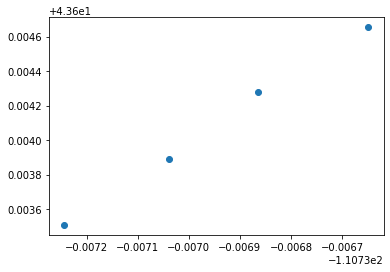

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(coords[:,0], coords[:,1])

In [ ]:
coords.tolist()

[[-110.73724404991711, 43.60350766400351],
 [-110.73703882828275, 43.60389174989592],
 [-110.73686483000805, 43.60427846298228],
 [-110.73664836785854, 43.60465461152495]]

In [ ]:
# image boundaries
bbox = (-110.7536, -110.7115, 43.5972,43.6156)

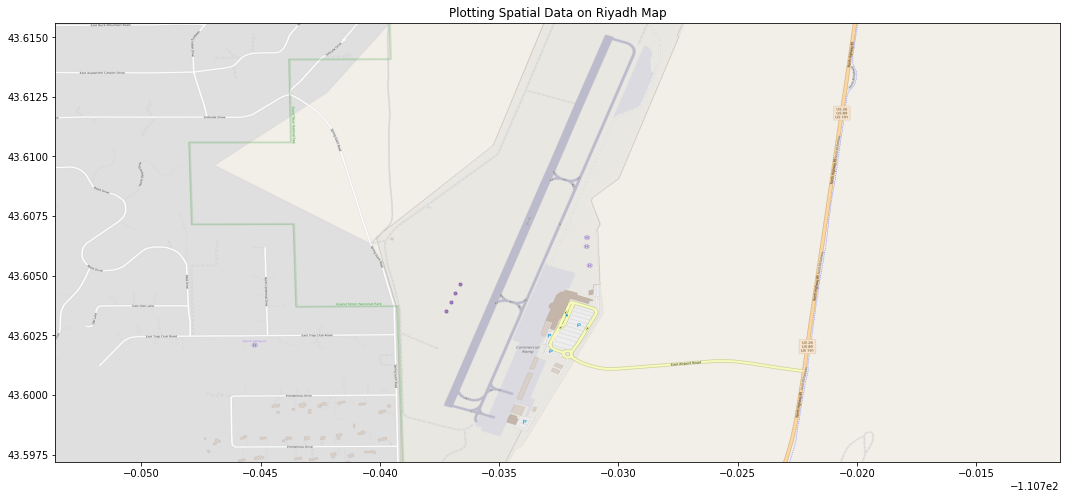

In [ ]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(coords[:,0], coords[:,1], zorder=1, alpha= 0.4, c='indigo', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')

ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

In [ ]:
from PIL import Image


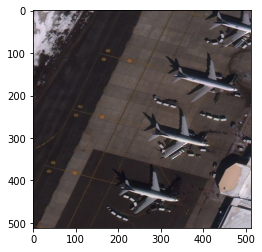

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/object_detection_torch' + '/datasets/rareplanes/train/PS-RGB_tiled' + '/103_10400100080A3000_tile_160.png'
img = Image.open(img_path)
plt.imshow(img)

# plot to folium map
https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
df_rp_prjctd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
df_rp_prjctd = df_rp_prjctd.to_crs(epsg=4326)
print(df_rp_prjctd.crs)
df_rp_prjctd.head(1)

epsg:4326


,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,num_tail_fins,...,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,geometry,centroids
0,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,33.587068,538.07106,3,1,0,1.0,0,538.07106,"POLYGON ((-110.73704 43.60346, -110.73733 43.6...",POINT (-110.73724 43.60351)


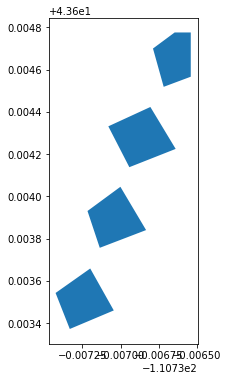

In [ ]:
df_rp_prjctd.plot(figsize=(6, 6))
plt.show()

In [ ]:
# create the map
m = folium.Map(location=[43.60335251803415, -110.73726034085128], zoom_start=15, tiles='CartoDB positron')
#-110.73726034085128, 43.61

In [ ]:
# for centroids
for _, r in df_rp_prjctd.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['centroids']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    #folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
for _, r in df_rp_prjctd.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.00000000001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    #folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
# add another layer
'''
folium.TileLayer('Stamen Terrain').add_to(m)
m
'''

"\nfolium.TileLayer('Stamen Terrain').add_to(m)\nm\n"

In [ ]:
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

m

## Create dummy dat

In [ ]:
import numpy as np

## Encode Rareplanes categories

In [ ]:
cat_vector = np.zeros((len(categories.keys()),))
print(cat_vector)

[0. 0. 0. 0. 0. 0. 0.]


## Create coordinate data

In [ ]:
# generate random coordinates

N = 50

# decide max, min lat
max_lat, min_lat = -90, 90
range_size_lat = (max_lat - min_lat)  # 2

# decide max, min lon
max_long, min_lon = -180, 180
range_size_lon = (max_long - min_lon)  # 2

coords = []
for i in range(N):
  coords.append((np.random.rand() * range_size_lat + min_lat, np.random.rand() * range_size_lon + min_lon))

coords = np.asarray(coords, dtype=np.float32)
print(coords.shape)
print(coords[0])

(50, 2)
[26.067142 98.937416]


# Generate n random sets of random lat, long pairs

In [ ]:
MAX_VEHICLES = 50

# decide max, min lat
max_lat, min_lat = -90, 90
range_size_lat = (max_lat - min_lat)  # 2

# decide max, min lon
max_long, min_lon = -180, 180
range_size_lon = (max_long - min_lon)  # 2

coords = []

# Create a random (between 1 and MAX_VEHICLES) count array (raggedy array) or coordinate pairs
for i in range(np.random.randint(1,MAX_VEHICLES)):
  coords.append((np.random.rand() * range_size_lat + min_lat, np.random.rand() * range_size_lon + min_lon))
coords = np.asarray(coords, dtype=np.float32)
print(coords.shape)
print(coords[0])

(26, 2)
[ -4.5491815 -33.890865 ]


# Generate fixed amount of n random sets of lat, long pairs (outer loop)
- coords done in long, lat
-       coords = np.asarray((np.random.rand() * range_size_lon + min_lon, np.random.rand() * range_size_lat + min_lat), dtype=np.float32)


## From osm work below to find background image and min,max, lat,long
BBox = (-110.8125, -110.6443, 43.5719,  43.6470)

In [ ]:
plots = (-110.7588, -110.7114, 43.6157, 43.5969)

In [ ]:
MAX_VEHICLES = 50
SEQUENCE_LENGTH = 360
SAMPLE_LENGTH = 500

# decide max, min lat
max_lat, min_lat = 43.6157, 43.5969
range_size_lat = (max_lat - min_lat)  # 2

# decide max, min lon
max_long, min_lon = -110.7588, -110.7114
range_size_lon = (max_long - min_lon)  # 2

# Create a sample length count (SAMPLE_DATA) of time-sequence duration for variable cooridnate pairs (ex. 360 days and variable up to 50 pairs of SAMPLE_LENGTH)
SAMPLE_DATA = np.zeros((SAMPLE_LENGTH, SEQUENCE_LENGTH, MAX_VEHICLES, 2))

for i in range(SAMPLE_LENGTH):

  for j in range(SEQUENCE_LENGTH):

  # Create a random (between 1 and MAX_VEHICLES) count array (raggedy array) or coordinate pairs
    for k in range(np.random.randint(1,MAX_VEHICLES+1)):
      coords = np.asarray((np.random.rand() * range_size_lat + min_lat, np.random.rand() * range_size_lon + min_lon), dtype=np.float32)
      SAMPLE_DATA[i,j,k] = coords

In [ ]:
SAMPLE_DATA.shape

(500, 360, 50, 2)

In [ ]:
# Check for numbers at the last index of all length-(0< len <=50) arrays
count = 0
for sample in SAMPLE_DATA:
  for sequence in sample:
    if sequence[49,0] != 0 or sequence[49,1] != 0:

      print(sequence[49,0], sequence[49,1])
      count+=1

print(count)

43.60791778564453 -110.73748016357422
43.61216735839844 -110.71235656738281
43.6060676574707 -110.75640106201172
43.60205078125 -110.73954772949219
43.5992431640625 -110.71524047851562
43.61030578613281 -110.7229995727539
43.6013298034668 -110.71685028076172
43.61262130737305 -110.75532531738281
43.59872055053711 -110.73445129394531
43.60831069946289 -110.73092651367188
43.60234069824219 -110.7493896484375
43.6099739074707 -110.73289489746094
43.60209274291992 -110.73925018310547
43.61345672607422 -110.71438598632812
43.609432220458984 -110.71702575683594
43.60037612915039 -110.72280883789062
43.613731384277344 -110.74882507324219
43.61476516723633 -110.73595428466797
43.599361419677734 -110.73619842529297
43.60976028442383 -110.71698760986328
43.61513137817383 -110.75353240966797
43.613380432128906 -110.7554702758789
43.613525390625 -110.74018859863281
43.608551025390625 -110.71173095703125
43.607540130615234 -110.7307357788086
43.60550308227539 -110.71226501464844
43.60004425048828 -

In [ ]:
SAMPLE_DATA[-1]

array([[[  43.59955978, -110.73307037],
        [  43.61530685, -110.75756836],
        [  43.60258102, -110.72450256],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       [[  43.59848404, -110.7396698 ],
        [  43.59992218, -110.74082947],
        [  43.61178207, -110.74578094],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       [[  43.61110687, -110.74066162],
        [  43.60001755, -110.74858093],
        [  43.60326385, -110.71923828],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       ...,

       [[  43.60639572, -110.7485733 ],
        [  43.59975433, -110.7434845 ],
        [  43.6005249 , -110.72316742],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [

In [ ]:
SAMPLE_DATA[8]

array([[[  43.60666656, -110.75088501],
        [  43.61199188, -110.73535919],
        [  43.60065842, -110.74770355],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       [[  43.6147995 , -110.74225616],
        [  43.60787201, -110.72554016],
        [  43.60718918, -110.73487854],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       [[  43.59803772, -110.73090363],
        [  43.61523056, -110.72779846],
        [  43.60885239, -110.73491669],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]],

       ...,

       [[  43.59972382, -110.75834656],
        [  43.60588074, -110.75846863],
        [  43.60702896, -110.7382431 ],
        ...,
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [

## Create synthetic labels with category dictionary

In [ ]:
# SAMPLE_DATA SHAPE

i,j,k,l = SAMPLE_DATA.shape

print(i,j,k,l)

500 360 50 2


In [ ]:
cat_vector = np.zeros((len(categories.keys()),))
SAMPLE_Y = np.zeros((i,j,k,len(categories.keys())+1))
SAMPLE_Y.shape

(500, 360, 50, 8)

In [ ]:
# Pick a random int from category cardinality

np.random.randint(0, len(categories.keys())+1)

3

In [ ]:
for i in range(SAMPLE_LENGTH):

  for j in range(SEQUENCE_LENGTH):

    # Create a random (between 1 and MAX_VEHICLES) count array (raggedy array) or coordinate pairs
    for k in range(MAX_VEHICLES):
      SAMPLE_Y[i,j,k,np.random.randint(0, len(categories.keys()))] = 1

In [ ]:
SAMPLE_Y[0,0,4]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
category_map = {}

for k,v in categories.items():
  category_map[v] = k

In [ ]:
num_cats_rand = np.random.randint(0, len(categories.keys()))

label = SAMPLE_Y[0,0,num_cats_rand].argmax()

category_map[label]

'Medium Civil Transport/Utility'

In [ ]:
print(str(np.array(np.zeros((42,42)),dtype=float)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

app_df = pd.DataFrame(SAMPLE_DATA[0,0])

In [ ]:
VEHICLE_DATA = SAMPLE_DATA[0,:,0] # same as SAMPLE_DATA[0,0,0,:]
VEHICLE_DATA

array([[  43.60705566, -110.72160339],
       [  43.60566711, -110.72077179],
       [  43.61448669, -110.73088837],
       [  43.60655212, -110.71750641],
       [  43.61047363, -110.73930359],
       [  43.60189056, -110.72696686],
       [  43.60554504, -110.75322723],
       [  43.60996246, -110.75743866],
       [  43.59993744, -110.73491669],
       [  43.60483551, -110.75067139],
       [  43.61567688, -110.72710419],
       [  43.60691071, -110.74107361],
       [  43.61322021, -110.73664856],
       [  43.60925674, -110.72175598],
       [  43.60439682, -110.75311279],
       [  43.61113739, -110.73860168],
       [  43.60391998, -110.73910522],
       [  43.60784912, -110.74880981],
       [  43.60675812, -110.72187805],
       [  43.60747528, -110.75226593],
       [  43.60422516, -110.74887848],
       [  43.6043663 , -110.73583221],
       [  43.60398483, -110.71266174],
       [  43.59991074, -110.74090576],
       [  43.61143494, -110.74253845],
       [  43.61338043, -1

## Switched xy below from
- Switched loc_geom = [Point(xy) for xy in zip(loc_geom[:,`0`], loc_geom[:,`1`])]
#### to
- Switched loc_geom = [Point(xy) for xy in zip(loc_geom[:,`1`], loc_geom[:,`0`])]
#### due to above trying to map all values to range of lat, long

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


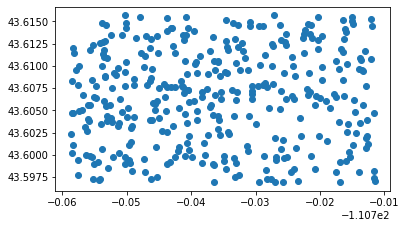

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load your application data with Pandas

app_df = pd.DataFrame(VEHICLE_DATA)
#app_df = pd.read_csv(app_data_dir/'app.csv')

# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
loc_crs = {'init': 'epsg:4326'}

loc_geom = VEHICLE_DATA
loc_geom = [Point(xy) for xy in zip(loc_geom[:,1], loc_geom[:,0])]

geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
geo_df.plot()

Text(0.5, 1.0, 'Points')

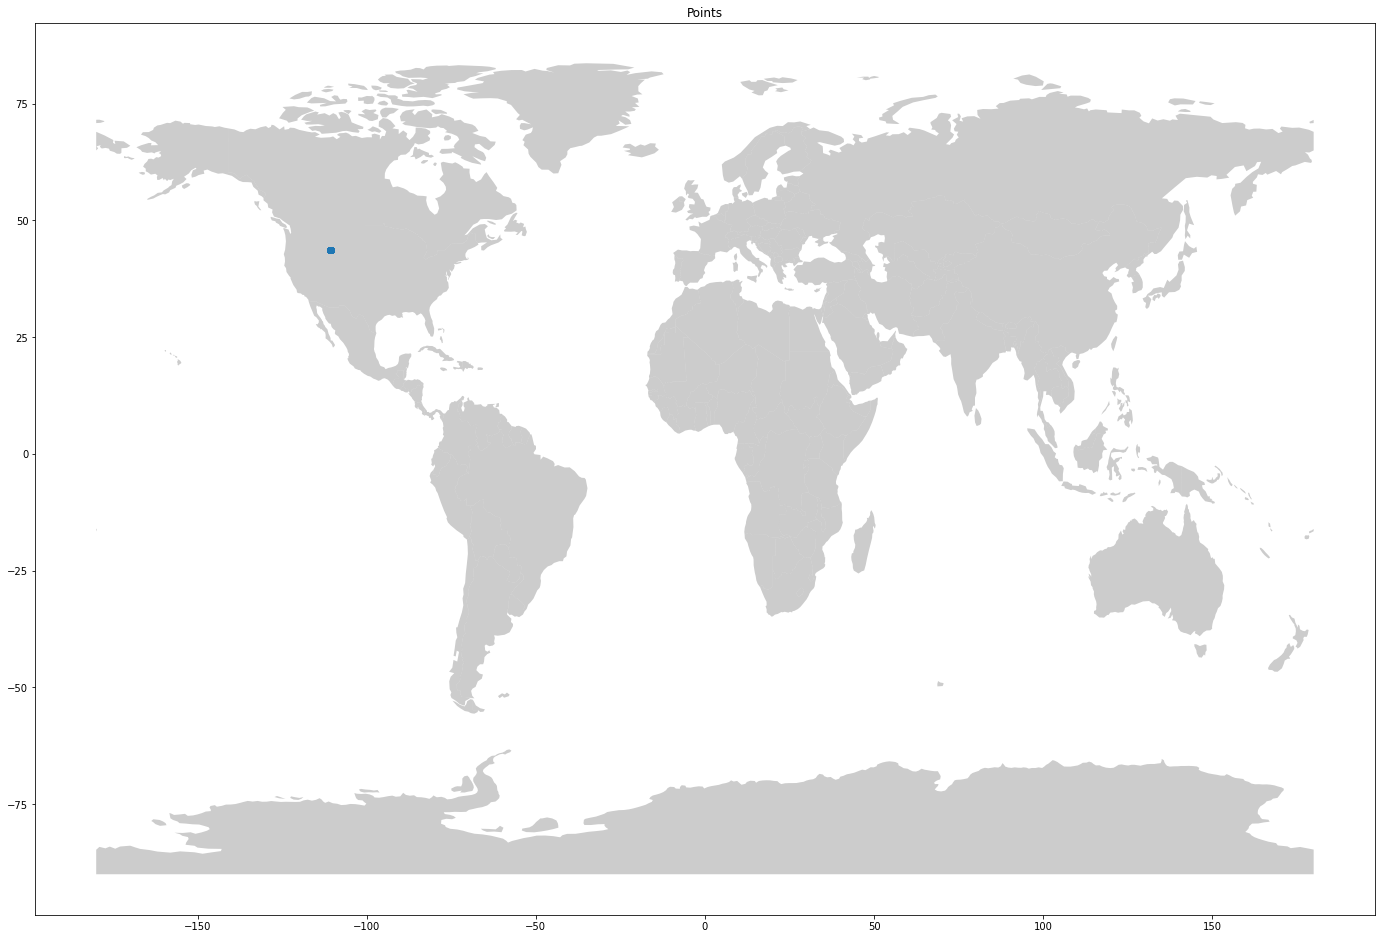

In [ ]:
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, legend=True)
plt.title('Points')

In [ ]:
app_df.head(1)

,0,1,geometry
0,43.607056,-110.721603,POINT (-110.72160 43.60706)


In [ ]:
geo_df.head(1)

,0,1,geometry
0,43.607056,-110.721603,POINT (-110.72160 43.60706)


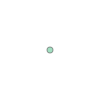

In [ ]:
loc_geom[0]

# Plot geodataframe points to map
https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
geo_df.head()

,0,1,geometry
0,43.607056,-110.721603,POINT (-110.72160 43.60706)
1,43.605667,-110.720772,POINT (-110.72077 43.60567)
2,43.614487,-110.730888,POINT (-110.73089 43.61449)
3,43.606552,-110.717506,POINT (-110.71751 43.60655)
4,43.610474,-110.739304,POINT (-110.73930 43.61047)


In [ ]:
'''
BBox = (geo_df[1].min(),   geo_df[1].max(),      
         geo_df[0].min(), geo_df[0].max())
'''

plots = (-110.7588, -110.7114, 43.6157, 43.5969)
BBox = (-110.7783, -110.6834, 43.6290, 43.5914)

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/NGA/Foundation/geo deep learning'

https://www.openstreetmap.org/#map=14/43.6021/-110.7168

In [ ]:
coords = np.asarray(list_arrays)
coords

array([[-110.73724404991711, 43.60350766400351],
       [-110.73703882828275, 43.60389174989592],
       [-110.73686483000805, 43.60427846298228],
       [-110.73664836785854, 43.60465461152495]], dtype=object)

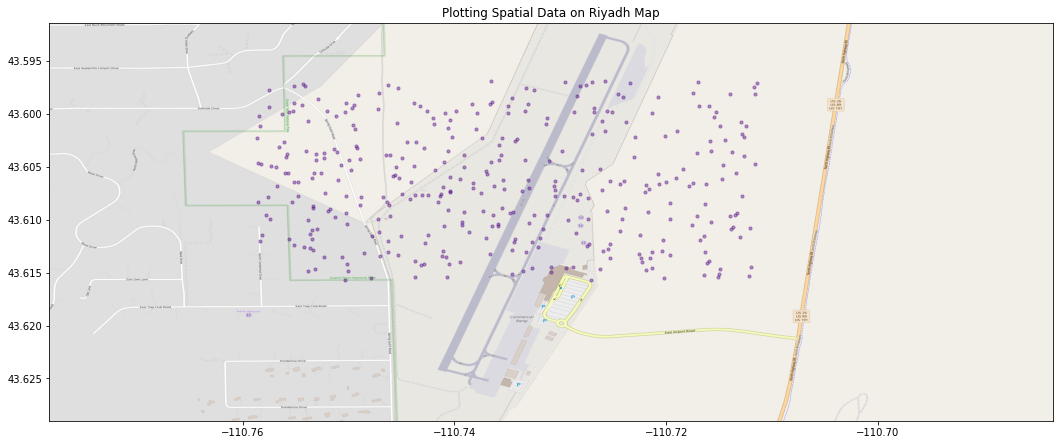

In [ ]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (18,18))
ax.scatter(list(geo_df.iloc[:,1]), list(geo_df.iloc[:,0]), zorder=1, alpha= 0.4, c='indigo', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
list(zip(list(geo_df.iloc[:,1]), list(geo_df.iloc[:,0])))

[(-110.72160339355469, 43.6070556640625),
 (-110.72077178955078, 43.60566711425781),
 (-110.73088836669922, 43.61448669433594),
 (-110.7175064086914, 43.60655212402344),
 (-110.73930358886719, 43.6104736328125),
 (-110.72696685791016, 43.601890563964844),
 (-110.75322723388672, 43.60554504394531),
 (-110.75743865966797, 43.609962463378906),
 (-110.73491668701172, 43.599937438964844),
 (-110.75067138671875, 43.604835510253906),
 (-110.72710418701172, 43.61567687988281),
 (-110.74107360839844, 43.606910705566406),
 (-110.73664855957031, 43.61322021484375),
 (-110.72175598144531, 43.609256744384766),
 (-110.75311279296875, 43.60439682006836),
 (-110.73860168457031, 43.61113739013672),
 (-110.73910522460938, 43.603919982910156),
 (-110.74880981445312, 43.60784912109375),
 (-110.72187805175781, 43.60675811767578),
 (-110.75226593017578, 43.60747528076172),
 (-110.7488784790039, 43.604225158691406),
 (-110.73583221435547, 43.604366302490234),
 (-110.71266174316406, 43.60398483276367),
 (-110

In [ ]:
geo_df

,0,1,geometry
0,43.607056,-110.721603,POINT (-110.72160 43.60706)
1,43.605667,-110.720772,POINT (-110.72077 43.60567)
2,43.614487,-110.730888,POINT (-110.73089 43.61449)
3,43.606552,-110.717506,POINT (-110.71751 43.60655)
4,43.610474,-110.739304,POINT (-110.73930 43.61047)
...,...,...,...
355,43.609585,-110.713486,POINT (-110.71349 43.60958)
356,43.604576,-110.740944,POINT (-110.74094 43.60458)
357,43.604069,-110.755943,POINT (-110.75594 43.60407)
358,43.607311,-110.733582,POINT (-110.73358 43.60731)


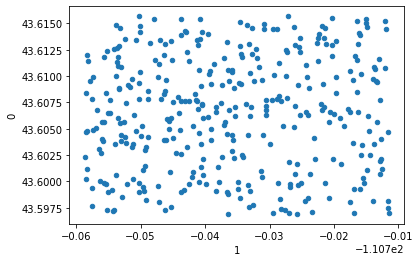

In [ ]:
geo_df.plot(kind="scatter", x=1, y=0)

In [ ]:
geo_df.iloc[:,0].count()/4000

0.09

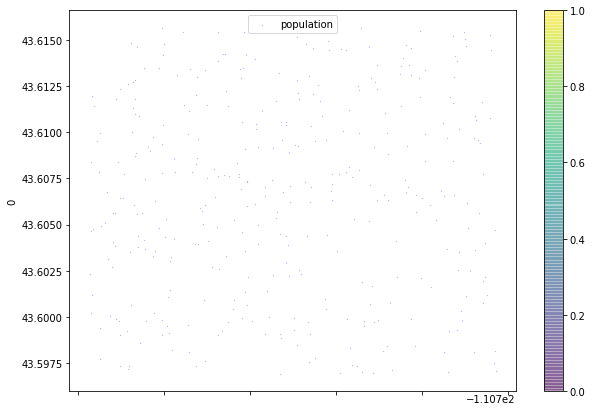

In [ ]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
geo_df.plot(kind="scatter", x=1, y=0,
    s=geo_df.iloc[:,0].count()/4000, label="population",
    c="b", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()

In [ ]:
plots = (-110.7588, -110.7114, 43.6157, 43.5969)


# changed `plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
` below to add coordinates from `plots box osm` above

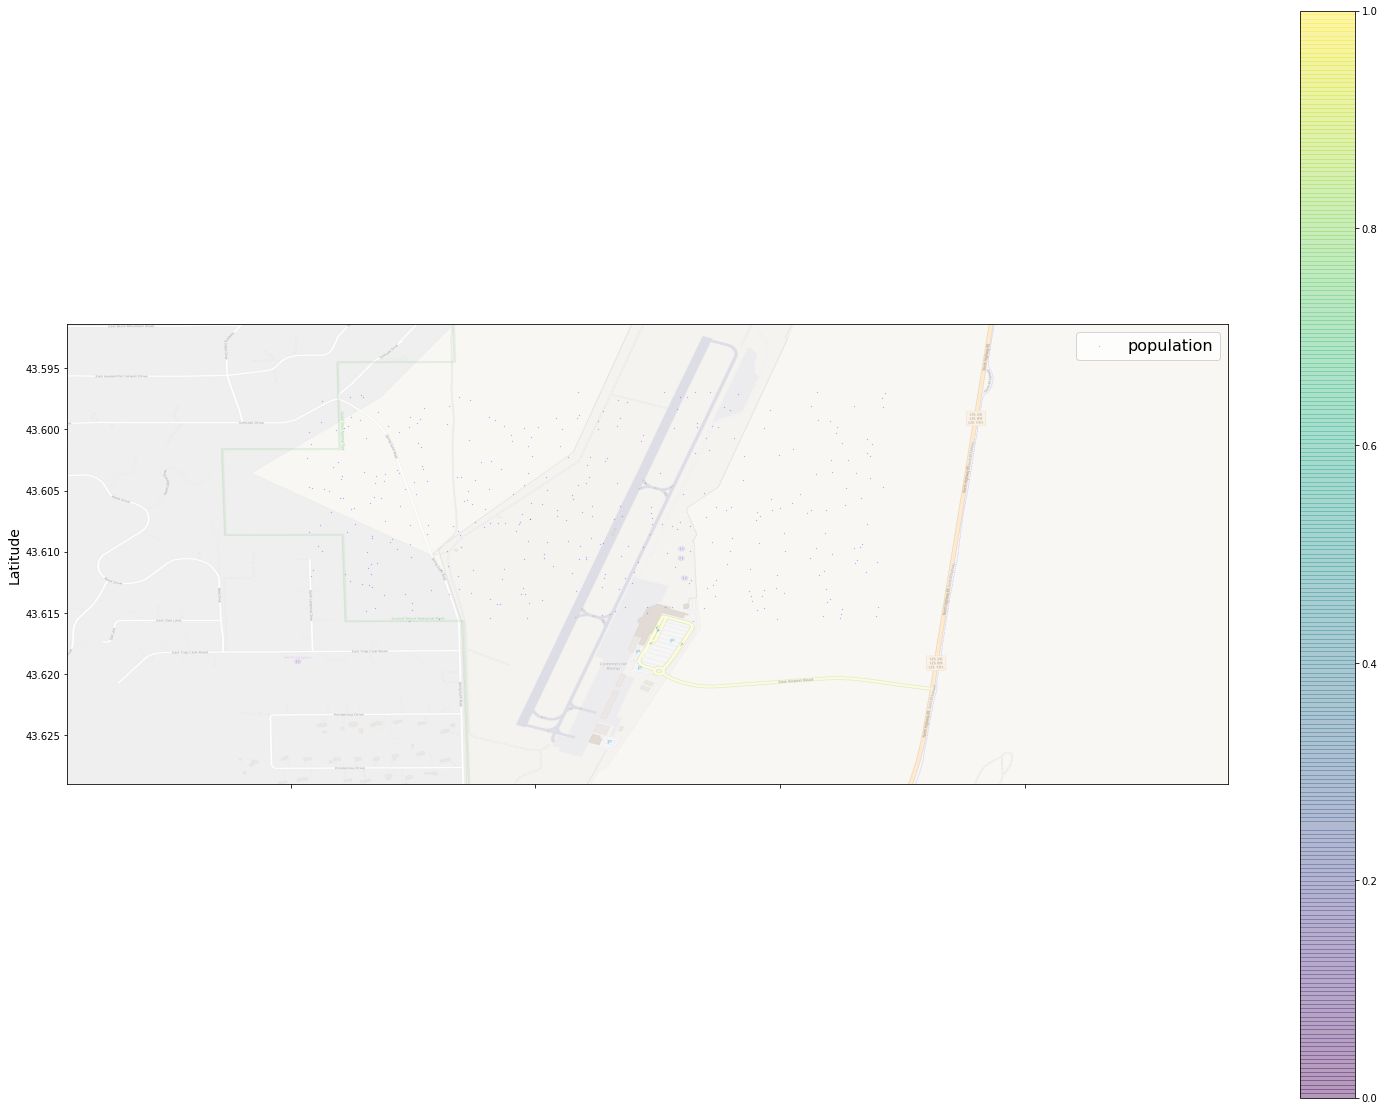

In [ ]:
# This is a excellent discussion of the ideas involved in a plot with a colorbar
# https://stackoverflow.com/questions/19816820/how-to-retrieve-colorbar-instance-from-figure-in-matplotlib
# What's called a "scalar mappable" in that discussion might also be called a scalar-valued function,
# a function that assigns a scalar value to each x,y point being plotted. Our scalar mappable in
# this example is NOT the image of CA, but the housing prices assigned tp each point in the scatter plot.
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join('.','map.png'))
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = geo_df.plot(kind="scatter", x=1, y=0,
    s=geo_df.iloc[:,0].count()/4000, label="population",
    c="b", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(26,20),
)
plt.imshow(california_img, extent=[-110.7783, -110.6834, 43.6290, 43.5914], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = geo_df.iloc[:,0].count()
tick_values = np.linspace(prices.min(), prices.max(), 11)
# Creating the plot later (doing the plot with colorbar=False) creates some sort of scaling issues.
# Only not sure why.
#cbar = plt.colorbar(ax=ax)
#cbar.ax.set_yticks([int(round(v/1000)) for v in tick_values])
#cbar.ax.set_yticklabels(["${0:d}k".format(int(round(v/1000))) for v in tick_values])
#cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

## Find centerpoint of osm image for opentiles map

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#[print(xy) for xy in zip(x,y)]

In [ ]:
# https://www.openstreetmap.org/export#map=15/43.6072/-110.7276
# https://gis.stackexchange.com/questions/294206/how-to-create-a-simple-polygon-from-coordinates-in-geopandas-with-python

from shapely.geometry import Point

import geopandas as gpd
from shapely.geometry import Polygon
'''
43.6260 -110.7750

43.5884 -110.7750

43.5884 -110.6802

43.6260 -110.6802
'''
lat_point_list = [43.6260, 43.5884, 43.5884, 43.6260]
lon_point_list = [-110.7750, -110.7750, -110.6802, -110.6802]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       

polygon

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry
0,"POLYGON ((-110.77500 43.62600, -110.77500 43.5..."


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # This is added back by InteractiveShellApp.init_path()


0      POINT (-110.72760 43.60720)
1                             None
2                             None
3                             None
4                             None
                  ...             
355                           None
356                           None
357                           None
358                           None
359                           None
Name: centroids, Length: 360, dtype: geometry

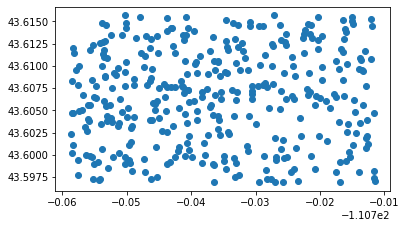

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

loc_crs = {'init': 'epsg:4326'}

osm_df = pd.DataFrame()
osm_gdf = gpd.GeoDataFrame(osm_df, crs=loc_crs, geometry=loc_geom)
osm_gdf.plot()

osm_gdf['centroids'] = polygon.centroid
osm_gdf['centroids']

In [ ]:
osm_gdf

,geometry,centroids
0,POINT (-110.72160 43.60706),POINT (-110.72760 43.60720)
1,POINT (-110.72077 43.60567),None
2,POINT (-110.73089 43.61449),None
3,POINT (-110.71751 43.60655),None
4,POINT (-110.73930 43.61047),None
...,...,...
355,POINT (-110.71349 43.60958),None
356,POINT (-110.74094 43.60458),None
357,POINT (-110.75594 43.60407),None
358,POINT (-110.73358 43.60731),None


In [ ]:
!pip3 install pointpats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 2.4 MB 11.6 MB/s 
     |████████████████████████████████| 66.7 MB 19 kB/s 
  Created wheel for pointpats: filename=pointpats-2.2.0-py3-none-any.whl size=60835 sha256=0394dbb41fb1caf8cc82e84859786d8830c541d76cee4664595d910ffd4ed33b
  Stored in directory: /root/.cache/pip/wheels/41/5f/91/08cc68af630fafdc6bed36128abf8e716e062256a8495fdb2d
Successfully built pointpats
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import pointpats.quadrat_statistics as qs
from pointpats import PointPattern, as_window

In [ ]:
lat_point_list = [43.6260, 43.5884, 43.5884, 43.6260]
lon_point_list = [-110.7750, -110.7750, -110.6802, -110.6802]

lat_point_list = list(geo_df[0])
lon_point_list = list(geo_df[1])

points = [(x,y) for x,y in zip(lat_point_list,lon_point_list)]

In [ ]:
pp_juv = PointPattern(points)
pp_juv

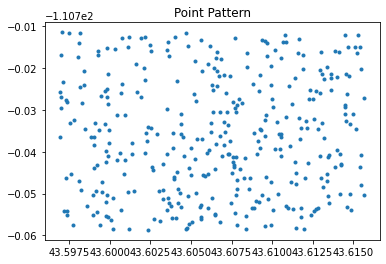

In [ ]:
pp_juv.plot()

In [ ]:
q_r = qs.QStatistic(pp_juv,shape= "rectangle",nx = 3, ny = 3)

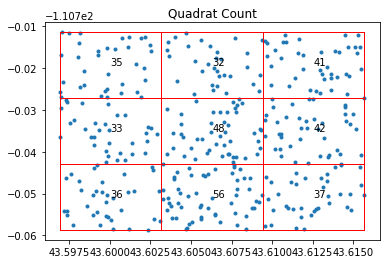

In [ ]:
q_r.plot()